In [1]:
import requests
from bs4 import BeautifulSoup 
import time
import re

## 개념 정리

In [2]:
movie_search_url = 'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=36470902&qvt=0&query=%EC%98%81%ED%99%94%20%EC%A0%84%EC%A7%80%EC%A0%81%20%EB%8F%85%EC%9E%90%20%EC%8B%9C%EC%A0%90%20%EB%A6%AC%EB%B7%B0'
user_agent = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36'}
response = requests.get(movie_search_url, headers = user_agent)
html = BeautifulSoup(response.text, 'lxml')

In [3]:
# 영화 리뷰 블로그 주소 수집
blog_urls = html.select('dt.list_title > a.review_link')
len(blog_urls)

10

In [4]:
# 블로그 페이지 요청1
response2 = requests.get(blog_urls[0].get('href'), headers = user_agent)
html2 = BeautifulSoup(response2.text, 'lxml')
html2

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<!-- [D] XHTML 1.0 형식에 맞게 언어속성 추가--><html lang="ko" xml:lang="“ko“" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="noindex,follow" name="robots"/>
<meta content="always" name="referrer"/>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="/favicon.ico?3" rel="shortcut icon" type="image/x-icon"/>
<link href="https://rss.blog.naver.com/ptj0969.xml" rel="alternate" title="RSS feed for ptj0969 Blog" type="application/rss+xml"/>
<link href="https://blog.naver.com/NBlogWlwLayout.naver?blogId=ptj0969" rel="wlwmanifest" type="application/wlwmanifest+xml"/>
<title>에레키맨의 무겐 블로그 : 네이버 블로그</title>
</head>
<script charset="UTF-8" src="https://ssl.pstatic.net/t.static.blog/mylog/versionin

In [5]:
html2.select_one('#mainFrame')

<iframe allowfullscreen="true" id="mainFrame" name="mainFrame" onload="oFramesetTitleController.start(self.frames['mainFrame'], self, sTitle);oFramesetTitleController.onLoadFrame();oFramesetUrlController.start(self.frames['mainFrame']);oFramesetUrlController.onLoadFrame();document.querySelector('#mainFrame').focus();" scrolling="auto" src="/PostView.naver?blogId=ptj0969&amp;logNo=223940744385&amp;redirect=Dlog&amp;widgetTypeCall=true&amp;noTrackingCode=true&amp;directAccess=false"></iframe>

In [6]:
blog_sub_url = html2.select_one('#mainFrame').get('src')
# 온전한 url이 아니라 정상적인 url로 변형 필요
print(blog_sub_url)

blog_real_url = f'https://blog.naver.com{blog_sub_url}'
print(blog_real_url)

/PostView.naver?blogId=ptj0969&logNo=223940744385&redirect=Dlog&widgetTypeCall=true&noTrackingCode=true&directAccess=false
https://blog.naver.com/PostView.naver?blogId=ptj0969&logNo=223940744385&redirect=Dlog&widgetTypeCall=true&noTrackingCode=true&directAccess=false


In [7]:
# 아이프레임 태그 보안 뚫고 정상 url로 접근
response3 = requests.get(blog_real_url, headers = user_agent)
html3 = BeautifulSoup(response3.text, 'lxml')

In [8]:
# 영화 정보, 별점 등 요소 삭제하기
# 요소명.extract()
html3.select_one('div.se-material-info').extract()

# 여러개인 경우
# for span in html3.select('div.se-component.se-text-se-1-default span.se-fs-fs11.se-ff-nanumbareunhipi'):
#     span.extract()

<div class="se-material-info">
<div class="se-material-info-container">
<strong class="se-material-title">전지적 독자 시점 </strong>
<dl class="se-material-detail">
<dt class="se-material-detail-title">감독</dt>
<dd class="se-material-detail-description">김병우</dd>
<dt class="se-material-detail-title">출연</dt>
<dd class="se-material-detail-description">안효섭, 이민호, 채수빈, 신승호, 나나, 지수, 권은성</dd>
<dt class="se-material-detail-title">개봉</dt>
<dd class="se-material-detail-description">                                                2025.07.23.
</dd> </dl>
</div>
</div>

In [9]:
# 블로그 내 리뷰 데이터 접근
review = html3.select_one('div.se-main-container')
print(review.text.strip())

영화 전지적 독자 시점에 대한 원작 파괴 논란에 답한 김병우 감독 인터뷰​다음주 개봉을 앞두고 있는 전독시 영화 전지적 독자 시점의 원작 파괴 관련으로김병우 감독이 이에 대해서 여러가지 설정 변경에 대한 이야기를따로 인터뷰로서 토로한 이야기가 추가적으로 공개전지적 독자 시점 영화가 원작과 달라지게 된 부분 등에 대해서이번 인터뷰를 통하여 공개를 하고 있다고 합니다.​배후성 설정 생략가장 큰 논란 중 하나는 원작의 핵심 설정이었던 배후성이 영화에서 다뤄지지 않았다는 점김병우 감독은 정확히 말하면 제거한 게 아니라 순차적으로 풀기 위해 미뤄둔 것이라며정보가 너무 많으면 관객이 혼란을 겪을 수 있다고 판단했다고 합니다.​추후 전독시 영화 차후 후속편을 만든다면 충분히 고민하고 접근할 예정이어서 전지적 독자 시점의 핵심은 포지셔닝으로서이 영화가 어떤 작품이고어떤 장르인지 뿌리를 다지는 것이 중요했다고 강조했습니다.​지수를 둘러싼 논란유중혁을 사부라 부르며 총을 다루는 고등학생 이지혜 역의 지수는 원작에서 이순신을 배후성으로 두고 있음에도 영화에서 칼이나 활이 아닌 총을 사용감독은 원작에서 다른 캐릭터들도 칼이라는 무기를 많이 쓰기에 시각적으로 전투 장면에서 차별화를 주고 싶었다"며 다양한 무기를 시도해보자는 생각에서 시작한 설정이라고 밝혔다.​다만 논란에 대해 예측을 못했고 그 지점을 놓쳤다며예상치 못한 논란이긴 했지만 다음 편에서는 원작의 설정을 충분히 반영할 수 있다며 후속편에서의 보완 가능성도 시사지수의 연기력 논란에 대해 그런 지적이 있다는 걸 알고 있으나 잘된 캐스팅이라고 생각한다며지수가 아니었다면 잘 모르고 넘어갈 수 있었을 법한 캐릭터라고 언급했다.​안효섭의 김독자 캐릭터 해석 원작의 독자는 비굴하거나 소극적인 성격이 아니었지만영화 속 김독자는 초반부 지하철 장면 등에서 다소 소심하게 묘사된다는 지적 감독은 독자란 인물을 생각했을 때 보편성과 특수성을 모두 갖춘 인물로서 김독자를 해석하고 싶었다고 설명했다. ​안효섭은 원작의 인물을 토대로 만들기보다 저만

## 모든 데이터 수집

In [10]:
import time
import random
import re
import requests as req
from bs4 import BeautifulSoup as bs

In [11]:
def preprocessing_setence_kr(w):
    w = w.strip()
    w = re.sub(r'[^0-9가-힣?.!,]+',' ', w)
    w = w.strip()
    return w

In [12]:
movie_search_url = 'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=36470902&qvt=0&query=%EC%98%81%ED%99%94%20%EC%A0%84%EC%A7%80%EC%A0%81%20%EB%8F%85%EC%9E%90%20%EC%8B%9C%EC%A0%90%20%EB%A6%AC%EB%B7%B0'
user_agent = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36'}

response = req.get(movie_search_url, headers = user_agent)
html = bs(response.text, 'lxml')

In [13]:
# 영화 리뷰 블로그 주소 수집
blog_urls = html.select('dt.list_title > a.review_link')

blog_url_list = []

for url in blog_urls:
    if 'post' not in url.get('href'):
        blog_url_list.append(url.get('href'))
print(blog_url_list)

['https://blog.naver.com/ptj0969/223940744385', 'https://blog.naver.com/kaminari2002/223944899354', 'https://blog.naver.com/duswns202/223942684385', 'https://blog.naver.com/chorki/223948563710', 'https://blog.naver.com/rissnam/223949036175', 'https://blog.naver.com/aronmovie/223944770636', 'https://blog.naver.com/sssundog/223950091761', 'https://blog.naver.com/jakeunji333/223938408906', 'https://blog.naver.com/gomsolvie/223938586442', 'https://blog.naver.com/movie_dream/223948014619']


In [14]:
f = open('네이버영화리뷰데이터.txt','w')

In [15]:
f = open('네이버영화리뷰데이터.txt','w')

for i in range(len(blog_url_list)):
    print('-'*20, f'{i+1}페이지')
    
    response2 = req.get(blog_url_list[i], headers = user_agent)
    html2 = bs(response2.text, 'lxml')
    
    blog_sub_url = html2.select_one('#mainFrame').get('src')
    blog_real_url = f'https://blog.naver.com{blog_sub_url}'
    
    time.sleep(random.randint(2,4))
    
    # 영화 리뷰 블로그 페이지 요청2(실제)
    response3 = req.get(blog_real_url, headers = user_agent)
    html3 = bs(response3.text, 'lxml')
    
    # 영화정보, 별점 요소 삭제
    try:
        html3.select_one('div.se-material-info').extract()
    except Exception as e:
        print(f'제거할 요소 없음: {e}')
        
    try:
        for span in html3.select('div.se-component.se-text.se-l-default span.se-fs-fs11.se-ff-nanumbareunhipi'):
            span.extract()
    except:
        print('제거할 요소 없음')
    
    # 블로그 내 리뷰 데이터 접근
    review = html3.select_one('div.se-main-container')
    # print(review.text.strip())
    # result = preprocessing_setence_kr(review.text)
    # f.write(result)
    if review:
            print(review.text.strip())
            result = preprocessing_setence_kr(review.text)
            f.write(result)
    else:
            print(f'{i+1}페이지에 리뷰 없음')

f.close()

-------------------- 1페이지
영화 전지적 독자 시점에 대한 원작 파괴 논란에 답한 김병우 감독 인터뷰​다음주 개봉을 앞두고 있는 전독시 영화 전지적 독자 시점의 원작 파괴 관련으로김병우 감독이 이에 대해서 여러가지 설정 변경에 대한 이야기를따로 인터뷰로서 토로한 이야기가 추가적으로 공개전지적 독자 시점 영화가 원작과 달라지게 된 부분 등에 대해서이번 인터뷰를 통하여 공개를 하고 있다고 합니다.​배후성 설정 생략가장 큰 논란 중 하나는 원작의 핵심 설정이었던 배후성이 영화에서 다뤄지지 않았다는 점김병우 감독은 정확히 말하면 제거한 게 아니라 순차적으로 풀기 위해 미뤄둔 것이라며정보가 너무 많으면 관객이 혼란을 겪을 수 있다고 판단했다고 합니다.​추후 전독시 영화 차후 후속편을 만든다면 충분히 고민하고 접근할 예정이어서 전지적 독자 시점의 핵심은 포지셔닝으로서이 영화가 어떤 작품이고어떤 장르인지 뿌리를 다지는 것이 중요했다고 강조했습니다.​지수를 둘러싼 논란유중혁을 사부라 부르며 총을 다루는 고등학생 이지혜 역의 지수는 원작에서 이순신을 배후성으로 두고 있음에도 영화에서 칼이나 활이 아닌 총을 사용감독은 원작에서 다른 캐릭터들도 칼이라는 무기를 많이 쓰기에 시각적으로 전투 장면에서 차별화를 주고 싶었다"며 다양한 무기를 시도해보자는 생각에서 시작한 설정이라고 밝혔다.​다만 논란에 대해 예측을 못했고 그 지점을 놓쳤다며예상치 못한 논란이긴 했지만 다음 편에서는 원작의 설정을 충분히 반영할 수 있다며 후속편에서의 보완 가능성도 시사지수의 연기력 논란에 대해 그런 지적이 있다는 걸 알고 있으나 잘된 캐스팅이라고 생각한다며지수가 아니었다면 잘 모르고 넘어갈 수 있었을 법한 캐릭터라고 언급했다.​안효섭의 김독자 캐릭터 해석 원작의 독자는 비굴하거나 소극적인 성격이 아니었지만영화 속 김독자는 초반부 지하철 장면 등에서 다소 소심하게 묘사된다는 지적 감독은 독자란 인물을 생각했을 때 보편성과 특수성을 모두 갖춘 인물로서 김독자를 해석하고 싶었다고 설명했다. 

## 전처리 및 시각화

In [32]:
# %pip install JPype1
%pip install konlpy
%pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/301.2 kB ? eta -:--:--
     -------------------------------------- 301.2/301.2 kB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import konlpy
from konlpy.tag import Okt

In [20]:
okt = Okt()
text = '환영합니다'
print(okt.morphs(text))

['환영', '합니다']


In [28]:
# 파일 불러오기
with open('네이버영화리뷰데이터.txt', 'r') as f:
    review_text = f.readline()
    
review_text

'영화 전지적 독자 시점에 대한 원작 파괴 논란에 답한 김병우 감독 인터뷰 다음주 개봉을 앞두고 있는 전독시 영화 전지적 독자 시점의 원작 파괴 관련으로김병우 감독이 이에 대해서 여러가지 설정 변경에 대한 이야기를따로 인터뷰로서 토로한 이야기가 추가적으로 공개전지적 독자 시점 영화가 원작과 달라지게 된 부분 등에 대해서이번 인터뷰를 통하여 공개를 하고 있다고 합니다. 배후성 설정 생략가장 큰 논란 중 하나는 원작의 핵심 설정이었던 배후성이 영화에서 다뤄지지 않았다는 점김병우 감독은 정확히 말하면 제거한 게 아니라 순차적으로 풀기 위해 미뤄둔 것이라며정보가 너무 많으면 관객이 혼란을 겪을 수 있다고 판단했다고 합니다. 추후 전독시 영화 차후 후속편을 만든다면 충분히 고민하고 접근할 예정이어서 전지적 독자 시점의 핵심은 포지셔닝으로서이 영화가 어떤 작품이고어떤 장르인지 뿌리를 다지는 것이 중요했다고 강조했습니다. 지수를 둘러싼 논란유중혁을 사부라 부르며 총을 다루는 고등학생 이지혜 역의 지수는 원작에서 이순신을 배후성으로 두고 있음에도 영화에서 칼이나 활이 아닌 총을 사용감독은 원작에서 다른 캐릭터들도 칼이라는 무기를 많이 쓰기에 시각적으로 전투 장면에서 차별화를 주고 싶었다 며 다양한 무기를 시도해보자는 생각에서 시작한 설정이라고 밝혔다. 다만 논란에 대해 예측을 못했고 그 지점을 놓쳤다며예상치 못한 논란이긴 했지만 다음 편에서는 원작의 설정을 충분히 반영할 수 있다며 후속편에서의 보완 가능성도 시사지수의 연기력 논란에 대해 그런 지적이 있다는 걸 알고 있으나 잘된 캐스팅이라고 생각한다며지수가 아니었다면 잘 모르고 넘어갈 수 있었을 법한 캐릭터라고 언급했다. 안효섭의 김독자 캐릭터 해석 원작의 독자는 비굴하거나 소극적인 성격이 아니었지만영화 속 김독자는 초반부 지하철 장면 등에서 다소 소심하게 묘사된다는 지적 감독은 독자란 인물을 생각했을 때 보편성과 특수성을 모두 갖춘 인물로서 김독자를 해석하고 싶었다고 설명했다. 안효섭은 원작의 인물을 토대로 만들기보다 저만

In [31]:
noun_list = okt.nouns(review_text)
print(noun_list)

['영화', '전지', '독자', '시점', '대한', '원작', '파괴', '논란', '답', '김병', '감독', '인터뷰', '다음주', '개봉', '독시', '영화', '전지', '독자', '시점', '원작', '파괴', '관련', '김병', '감독', '이', '대해', '여러가지', '설정', '변경', '대한', '이야기', '인터뷰', '로서', '토로', '이야기', '추가', '공개', '전지', '독자', '시점', '영화', '원작', '부분', '등', '대해', '이번', '인터뷰', '통', '공개', '배후', '설정', '생략', '가장', '논란', '중', '하나', '원작', '핵심', '설정', '배후', '영화', '점김병', '감독', '말', '제거', '게', '순차', '풀기', '위해', '것', '라며', '정보', '관객', '혼란', '수', '판단', '추후', '독시', '영화', '차후', '후', '속편', '고민', '접근', '예정', '전지', '독자', '시점', '핵심', '포지셔닝', '영화', '작품', '장르', '뿌리', '것', '강조', '지수', '논란', '유', '중혁', '사부', '총', '고등학생', '이지혜', '역', '지수', '원작', '이순신', '배후', '영화', '칼', '활', '총', '사용', '감독', '원작', '다른', '캐릭터', '칼', '무기', '쓰기', '시각', '전투', '장면', '차별', '며', '무기', '시도', '생각', '시작', '설정', '다만', '논란', '대해', '예측', '그', '지점', '상치', '못', '논란', '다음', '편', '원작', '설정', '반영', '수', '후', '속편', '보완', '가능성', '시사지', '수의', '연기력', '논란', '대해', '지적', '걸', '알', '캐스팅', '생각', '지수', '수', '법', '캐릭터', '언급', '안효섭', '김', '독자'

In [33]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [43]:
noun_list = okt.nouns(review_text)
counter = Counter(noun_list)
print(noun_list)
print(counter)

top_noun_list = counter.most_common(100)
print(top_noun_list)

['영화', '전지', '독자', '시점', '대한', '원작', '파괴', '논란', '답', '김병', '감독', '인터뷰', '다음주', '개봉', '독시', '영화', '전지', '독자', '시점', '원작', '파괴', '관련', '김병', '감독', '이', '대해', '여러가지', '설정', '변경', '대한', '이야기', '인터뷰', '로서', '토로', '이야기', '추가', '공개', '전지', '독자', '시점', '영화', '원작', '부분', '등', '대해', '이번', '인터뷰', '통', '공개', '배후', '설정', '생략', '가장', '논란', '중', '하나', '원작', '핵심', '설정', '배후', '영화', '점김병', '감독', '말', '제거', '게', '순차', '풀기', '위해', '것', '라며', '정보', '관객', '혼란', '수', '판단', '추후', '독시', '영화', '차후', '후', '속편', '고민', '접근', '예정', '전지', '독자', '시점', '핵심', '포지셔닝', '영화', '작품', '장르', '뿌리', '것', '강조', '지수', '논란', '유', '중혁', '사부', '총', '고등학생', '이지혜', '역', '지수', '원작', '이순신', '배후', '영화', '칼', '활', '총', '사용', '감독', '원작', '다른', '캐릭터', '칼', '무기', '쓰기', '시각', '전투', '장면', '차별', '며', '무기', '시도', '생각', '시작', '설정', '다만', '논란', '대해', '예측', '그', '지점', '상치', '못', '논란', '다음', '편', '원작', '설정', '반영', '수', '후', '속편', '보완', '가능성', '시사지', '수의', '연기력', '논란', '대해', '지적', '걸', '알', '캐스팅', '생각', '지수', '수', '법', '캐릭터', '언급', '안효섭', '김', '독자'

In [45]:
# 두글자 이상만 저장
noun_list_over = []
for noun in top_noun_list:
    if len(noun[0]) > 1:
        noun_list_over.append(noun)

noun_list_over

[('독자', 194),
 ('영화', 154),
 ('원작', 96),
 ('시점', 85),
 ('전지', 84),
 ('소설', 79),
 ('주인공', 64),
 ('게임', 44),
 ('이야기', 43),
 ('캐릭터', 43),
 ('미션', 40),
 ('설정', 34),
 ('세계', 34),
 ('판타지', 32),
 ('생각', 29),
 ('안효섭', 29),
 ('결말', 29),
 ('액션', 29),
 ('감독', 28),
 ('중혁', 28),
 ('연기', 28),
 ('사람', 27),
 ('내용', 25),
 ('지하철', 24),
 ('부분', 23),
 ('현실', 23),
 ('관객', 22),
 ('배우', 22),
 ('세계관', 22),
 ('나나', 21),
 ('위해', 20),
 ('인물', 19),
 ('이민호', 18),
 ('속편', 17),
 ('지수', 17),
 ('관람', 17),
 ('독시', 16),
 ('정보', 16),
 ('또한', 16),
 ('정도', 16),
 ('대한', 15),
 ('김병', 15),
 ('다른', 15),
 ('채수빈', 15),
 ('신승호', 15),
 ('동료', 15),
 ('개봉', 14),
 ('흥행', 14),
 ('개인', 14),
 ('쿠키', 14),
 ('연출', 14),
 ('모든', 14),
 ('대해', 13),
 ('시작', 13),
 ('작가', 13),
 ('한국', 13),
 ('느낌', 13),
 ('후기', 13),
 ('혼자', 13),
 ('멸살', 13),
 ('작품', 12),
 ('설명', 12),
 ('메시지', 12),
 ('전개', 12),
 ('몰입', 12),
 ('모습', 12),
 ('상황', 12),
 ('논란', 11),
 ('초반', 11),
 ('크게', 11),
 ('자신', 11),
 ('보고', 11),
 ('등장', 11),
 ('친구', 11)]

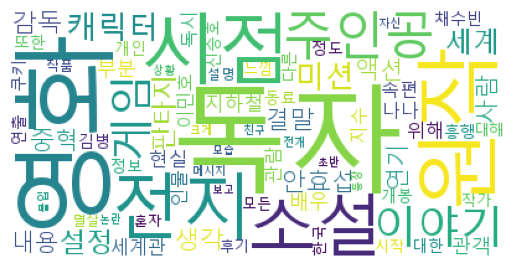

<Figure size 640x480 with 0 Axes>

In [ ]:
# 워드클라우드 그리기
wc = WordCloud(
    background_color = 'white',
    font_path = 'C://Windows/Fonts/malgun.TTF').generate_from_frequencies(dict(noun_list_over))

plt.imshow(wc)
plt.axis('off')
plt.show()

# plt.savefig('리뷰시각화.png')
wc.to_file('리뷰시각화2.png')